# Algoritmos de optimización - Reto 1

Nombre: Augusto Javier Ibañez Garcia  
Github: https://github.com/cibergus/VIU-AlgOptimizacion<br>

In [1]:
# INSTALLS & IMPORTS del proyecto
import time
import matplotlib.pyplot as plt


## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [2]:
# Torres de Hanoi

# La programación dinámica se cumple al uitilizar este diccionario:
# self.memoriza para memorizar y reutilizar los movimientos pre-calculados
# para cada configuración única de n discos y postes. 
# Esto aprovecha la característica de superposición de subproblemas y el uso de memorización

class Hanoi:
    def __init__(self):
        self.memoriza = {}
    
    def moverTorre(self, n, origen='A', auxiliar='B', destino='C'):
        key = (n, origen, auxiliar, destino)
        if n == 0:
            return []
        if key in self.memoriza:
            return self.memoriza[key]
        movimientos = []
        movimientos += self.moverTorre(n-1, origen, destino, auxiliar)
        movimientos.append(f"Mover disco {n} de {origen} a {destino}")
        movimientos += self.moverTorre(n-1, auxiliar, origen, destino)
        self.memoriza[key] = movimientos
        return movimientos

    def print_movimientos(self, n):
        movimientos = self.moverTorre(n)
        for move in movimientos:
            print(move)


In [8]:
# Ejemplo para 3 y 5 discos
n_discos = 3
print(f'Ejemplo para {n_discos} discos:')
hanoi = Hanoi()
hanoi.print_movimientos(n_discos)

print()

n_discos = 5
print(f'Ejemplo para {n_discos} discos:')
hanoi = Hanoi()
hanoi.print_movimientos(n_discos)

Ejemplo para 3 discos:
Mover disco 1 de A a C
Mover disco 2 de A a B
Mover disco 1 de C a B
Mover disco 3 de A a C
Mover disco 1 de B a A
Mover disco 2 de B a C
Mover disco 1 de A a C

Ejemplo para 5 discos:
Mover disco 1 de A a C
Mover disco 2 de A a B
Mover disco 1 de C a B
Mover disco 3 de A a C
Mover disco 1 de B a A
Mover disco 2 de B a C
Mover disco 1 de A a C
Mover disco 4 de A a B
Mover disco 1 de C a B
Mover disco 2 de C a A
Mover disco 1 de B a A
Mover disco 3 de C a B
Mover disco 1 de A a C
Mover disco 2 de A a B
Mover disco 1 de C a B
Mover disco 5 de A a C
Mover disco 1 de B a A
Mover disco 2 de B a C
Mover disco 1 de A a C
Mover disco 3 de B a A
Mover disco 1 de C a B
Mover disco 2 de C a A
Mover disco 1 de B a A
Mover disco 4 de B a C
Mover disco 1 de A a C
Mover disco 2 de A a B
Mover disco 1 de C a B
Mover disco 3 de A a C
Mover disco 1 de B a A
Mover disco 2 de B a C
Mover disco 1 de A a C


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

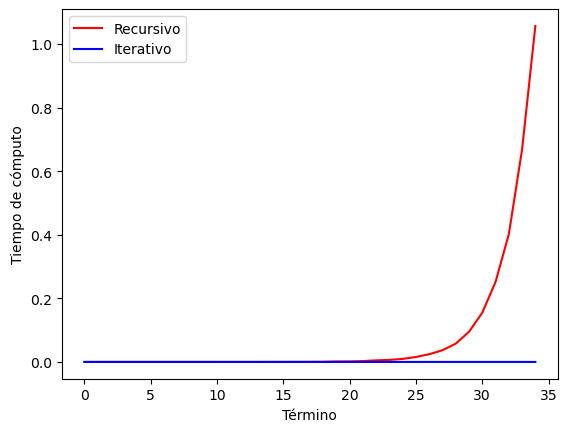

In [4]:
#Sucesión_de_Fibonacci

# Número de muestras a considerar en el problema
muestras = 35

def fibonacci_recursivo(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

def fibonacci_iterativo(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

num_muestras = list(range(muestras))
tiempos_recursivos = []
tiempos_iterativos = []

# Medir los tiempos para la función recursiva
for n in num_muestras:
    inicio = time.time()
    fibonacci_recursivo(n)
    fin = time.time()
    tiempos_recursivos.append(fin - inicio)

# Medir los tiempos para la función iterativa
for n in num_muestras:
    inicio = time.time()
    fibonacci_iterativo(n)
    fin = time.time()
    tiempos_iterativos.append(fin - inicio)

# Gráfica
plt.plot(num_muestras, tiempos_recursivos, label='Recursivo', color='red')
plt.plot(num_muestras, tiempos_iterativos, label='Iterativo', color='blue')
plt.xlabel('Término')
plt.ylabel('Tiempo de cómputo')
plt.legend()
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [10]:
# Problema del cambio de moneda

def devolucionCambioVoraz(cantidad, monedas):
    monedas.sort(reverse=True)
    cambio = []
    for denominacion in monedas:
        monedas = cantidad // denominacion
        cantidad -= monedas * denominacion
        cambio.extend([denominacion] * monedas)
    return cambio


# Ejemplo 1:
monedas = [50, 20, 10, 5, 2, 1]
cantidad = 93
cambio = devolucionCambioVoraz(cantidad, monedas)
print(f"Ejemplo 1: Cambio para {cantidad} céntimos: {cambio}")

# Ejemplo 2:
monedas = [100, 50, 25, 10, 5, 1]
cantidad = 287
cambio = devolucionCambioVoraz(cantidad, monedas)
print(f"Ejemplo 2: Cambio para {cantidad} céntimos: {cambio}")


Ejemplo 1: Cambio para 93 céntimos: [50, 20, 20, 2, 1]
Ejemplo 2: Cambio para 287 céntimos: [100, 100, 50, 25, 10, 1, 1]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [6]:
# Problema de las N-Reinas

# Comprobar si la columna o las diagonales tienen otra reina
def esSeguro(tablero, fila, columna, N):
    for i in range(fila):
        if tablero[i][columna] == 1:
            return False
    for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False
    for i, j in zip(range(fila, -1, -1), range(columna, N)):
        if tablero[i][j] == 1:
            return False
    return True

def resolverNReinas(tablero, fila, N):
    if fila >= N:
        return True
    for columna in range(N):
        if esSeguro(tablero, fila, columna, N):
            tablero[fila][columna] = 1
            if resolverNReinas(tablero, fila + 1, N):
                return True
            tablero[fila][columna] = 0
    return False


def imprimirSolucion(tablero, N):
    if resolverNReinas(tablero, 0, N):
        for fila in tablero:
            print(fila)
    else:
        print("No hay solución")
    print()

# Ejemplo 1
N = 6
print(f'Ejemplo 1 para {N} columnas:')
tablero = [[0] * N for _ in range(N)]
imprimirSolucion(tablero, N)

# Ejemplo 2
N = 8
print(f'Ejemplo 2 para {N} columnas:')
tablero = [[0] * N for _ in range(N)]
imprimirSolucion(tablero, N)


Ejemplo 1 para 6 columnas:
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]

Ejemplo 2 para 8 columnas:
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]

